In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, mean_squared_error as MSE
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold

### 1. Take one of the supervised learning models you have built recently and apply at least three dimensionality reduction techniques to it (separately). Be sure to create a short summary of each technique you use. Indicate how each changed the model performance. 

Reference:
https://machinelearningmastery.com/dimensionality-reduction-algorithms-with-python/

In [126]:
df = pd.read_csv('australian.csv')
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


<AxesSubplot:>

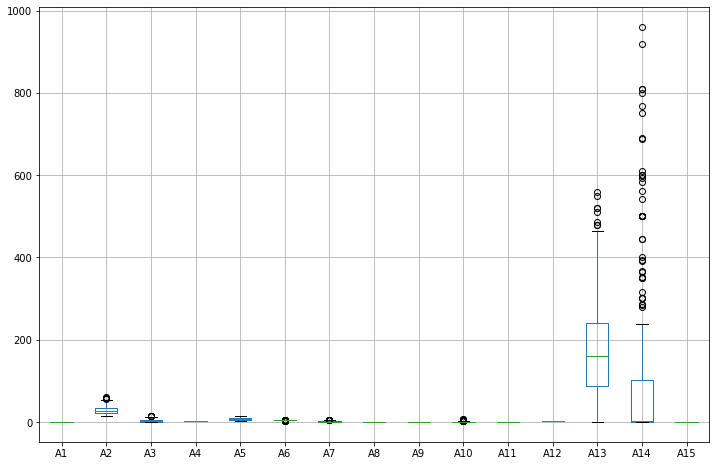

In [136]:
df.boxplot(figsize=(12,8))

In [130]:
# Replacing outliers with nulls in all the feature columns

for x in ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [132]:
df.isnull().sum()

A1       0
A2      18
A3      17
A4     165
A5       0
A6     215
A7      63
A8       0
A9       0
A10     79
A11      0
A12     65
A13     13
A14    113
A15      0
dtype: int64

In [134]:
# Droping all null values from Dataframe
df = df.dropna(axis=0)

In [135]:
# Dataframe after removing null values
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0,0
6,1.0,17.42,6.500,2.0,3.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,60.0,101.0,0
14,1.0,58.58,2.710,2.0,8.0,4.0,2.415,0.0,0.0,0.0,1.0,2.0,320.0,1.0,0
17,0.0,18.92,9.000,2.0,6.0,4.0,0.750,1.0,1.0,2.0,0.0,2.0,88.0,592.0,1
22,1.0,41.17,1.335,2.0,2.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,168.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,1.0,20.00,0.000,2.0,2.0,4.0,0.500,0.0,0.0,0.0,0.0,2.0,144.0,1.0,0
668,0.0,32.25,1.500,2.0,8.0,4.0,0.250,0.0,0.0,0.0,1.0,2.0,372.0,123.0,0
670,0.0,37.75,5.500,2.0,11.0,4.0,0.125,1.0,0.0,0.0,1.0,2.0,228.0,1.0,1
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0,45.0,0


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('A15',axis=1)
y = df['A15']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

model = LogisticRegression()

In [147]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [153]:
print('Training data score: ',model.score(X_train,y_train))

Training data score:  0.85


In [154]:
print('Test data score: ',model.score(X_test,y_test))

Test data score:  0.9111111111111111


In [152]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9111111111111111


### PCA method 

In [195]:
steps = [('pca', PCA(n_components=7)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores_tr = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores_te = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Training Accuracy: %.3f (%.3f)' % (mean(n_scores_tr), std(n_scores_tr)))
print('Test Accuracy: %.3f (%.3f)' % (mean(n_scores_te), std(n_scores_te)))

Training Accuracy: 0.706 (0.118)
Test Accuracy: 0.773 (0.169)


### Singular Value Decomposition Method

In [194]:
from sklearn.decomposition import TruncatedSVD

steps = [('svd', TruncatedSVD(n_components=7)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_tr = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores_te = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Training Accuracy: %.3f (%.3f)' % (mean(n_scores_tr), std(n_scores_tr)))
print('Test Accuracy: %.3f (%.3f)' % (mean(n_scores_te), std(n_scores_te)))

Training Accuracy: 0.709 (0.088)
Test Accuracy: 0.775 (0.226)


### Isomap Embedding Method

In [197]:
from sklearn.manifold import Isomap

steps = [('iso', Isomap(n_components=7)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores_tr = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
n_scores_te = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('Training Accuracy: %.3f (%.3f)' % (mean(n_scores_tr), std(n_scores_tr)))
print('Test Accuracy: %.3f (%.3f)' % (mean(n_scores_te), std(n_scores_te)))

Training Accuracy: 0.624 (0.079)
Test Accuracy: 0.663 (0.178)


### 2. Write a function that will indicate if an inputted IPv4 address is accurate or not. IP addresses are valid if they have 4 values between 0 and 255 (inclusive), punctuated by periods.

Input 1:
2.33.245.5
Output 1:
True

Input 2:
12.345.67.89
Output 2:
False

In [122]:
def ip_not(x):
    
    x=str(x)
    
    y = x.split(".")
    
    if len(y) == 4:
        for i in y:
            if int(i)>255 or int(i)<0:
                return False
            
        return True
          
    else:
        return False    

In [123]:
a = "2.33.453.5"

#print(a)
print(ip_not('2.33.245.5'))

print(ip_not('12.345.67.89'))

True
False
